# Loading Data

In [66]:
import numpy as np 
import pandas as pd

In [24]:
text =pd.read_csv('C:/Users/atang/Documents/03statisticsML/CourseProject/text_data.txt',sep='\s',encoding='UTF-8')
topic=pd.read_csv('C:/Users/atang/Documents/03statisticsML/CourseProject/topic_doc_true.txt',sep='\s',header=None,encoding='UTF-8')
cora =pd.read_csv('C:/Users/atang/Documents/03statisticsML/CourseProject/cora_data.txt',sep='\s',encoding='UTF-8')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from th

In [182]:
text.head()

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,...,word91,word92,word93,word94,word95,word96,word97,word98,word99,word100
0,0,0,1,1,1,2,1,2,5,8,...,4,3,0,4,0,8,2,1,0,3
1,0,1,7,9,1,3,0,0,6,0,...,2,0,0,1,0,0,3,7,3,3
2,1,3,8,17,1,3,0,0,4,1,...,3,1,3,0,0,0,2,10,5,7
3,1,0,0,4,6,0,1,2,5,11,...,6,3,1,5,0,6,2,1,0,2
4,1,0,2,5,0,1,0,1,10,8,...,5,3,0,4,0,2,0,4,2,1


In [181]:
cora.head()

,computer,algorithms,discovering,patterns,groups,protein,sequences,based,fitting,parameters,...,foreign,activities,unrestricted,contact,assignments,polynomials,coevolution,grouping,wavelet,floating
0,1,4,2,2,1,2,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [ ]:
import sys
!{sys.executable} -m pip install xlsxwriter

# Training Dataset

In [68]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [247]:
n_topics=3

In [248]:
#LDA
lda_model = LatentDirichletAllocation(n_components=3, learning_method='online',max_iter=5,
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(text)

In [249]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)
lda_keys

[2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,


In [250]:
topict=np.transpose(topic)
lda_keys2 = get_keys(topict.values)
lda_keys2

[2,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,


In [251]:
from sklearn.metrics import confusion_matrix
CFmat=confusion_matrix(y_true=lda_keys2,y_pred=lda_keys)
CFmat

array([[ 84,   2,   4],
       [  4, 100,   7],
       [  1,   0,  98]], dtype=int64)

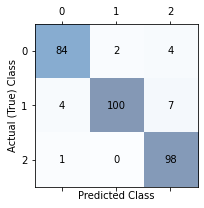

In [252]:
fig,ax=plt.subplots(figsize=(3,3))
ax.matshow(CFmat,cmap=plt.cm.Blues,alpha=0.5)
for i in range(CFmat.shape[0]):
    for j in range(CFmat.shape[1]):
        ax.text(x=j,y=i,s=CFmat[i,j],va="center",ha="center")
plt.xlabel("Predicted Class")
plt.ylabel("Actual (True) Class")
plt.show()

In [253]:
topictrue=np.array(np.transpose(topic))
x=lda_topic_matrix-topictrue
xdf=pd.DataFrame(x)

In [256]:
xdf[xdf>0.1]

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,0.108445
...,...,...,...
295,NaN,NaN,0.129899
296,NaN,NaN,NaN
297,NaN,NaN,NaN
298,NaN,NaN,NaN


In [260]:
temp=xdf[xdf>0.1]
temp.isna().sum()

0    291
1    294
2    257
dtype: int64

In [215]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.001s...
[t-SNE] Computed neighbors for 300 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 0.159493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.692436
[t-SNE] KL divergence after 650 iterations: 0.174170


In [160]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = np.array([ "#1f77b4", "#aec7e8", "#ff7f0e"])

In [219]:
#top_3_words_lsa = get_top_n_words(3, lsa_keys, text, text)
#lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

#for t in range(n_topics):
#    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
#                  text=top_3_words_lsa[t], text_color=colormap[t])
#    plot.add_layout(label)
    
show(plot)

In [220]:
tsne_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_vectors = tsne_model.fit_transform(topict)


plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_vectors[:,0], y=tsne_vectors[:,1], color=colormap[lda_keys2])
    
show(plot)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 300 samples in 0.000s...
[t-SNE] Computed neighbors for 300 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 300 / 300
[t-SNE] Mean sigma: 0.178105
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.796898
[t-SNE] KL divergence after 650 iterations: 0.188610


In [224]:
lda = LatentDirichletAllocation(n_components=3, max_iter=5,
                                learning_method = 'online',
                                random_state = 0)

lda.fit(text)
lda.components_

array([[2.05603041e+01, 6.07437486e+01, 4.21586697e+01, 3.20452519e+02,
        5.34605831e+02, 3.51376620e+01, 3.09444229e+02, 4.22305111e+01,
        2.53880458e+02, 6.77132328e+01, 9.37994832e+01, 1.11539751e+02,
        3.81789236e+02, 7.30709600e+00, 4.71371184e+02, 1.09498117e+02,
        7.43532964e+02, 4.03472881e+01, 1.36032670e+03, 2.94073439e+02,
        2.02988771e+01, 1.40018526e+03, 1.89785033e+02, 2.26389492e+01,
        1.19600920e+01, 8.83421156e+00, 2.25171547e+01, 3.80768713e+01,
        1.66338324e+02, 2.53955934e+01, 6.11565173e+02, 5.16789571e+02,
        1.03443153e+02, 6.78258281e+01, 1.05507487e+03, 5.74315891e+02,
        3.26717641e+01, 7.20635083e+01, 6.26579831e+01, 6.18788505e+02,
        7.54319030e+01, 1.48411597e+01, 6.24713809e+01, 7.60309401e+01,
        3.26025496e+01, 1.30682683e+02, 7.59478367e+02, 2.64807515e+01,
        2.13160575e+01, 6.44430730e+00, 7.89576975e+01, 2.00554106e+02,
        1.56047686e+02, 7.81152471e+01, 2.54213990e+01, 1.791266

In [225]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [226]:
nubmer_of_words=10
print("\nTopics in LDA model: ")
tf_feature_names =text.columns #note that tf_vectorizer is an LemmaCountVectorizer object and with this command we get the whole dictionary of words
print_top_words(lda_model, tf_feature_names, nubmer_of_words)


Topics in LDA model: 

Topic #0:word22 word19 word35 word47 word58 word17 word40 word31 word89 word36

Topic #1:word4 word57 word39 word87 word29 word82 word38 word98 word79 word23

Topic #2:word32 word10 word12 word9 word17 word28 word81 word71 word29 word35


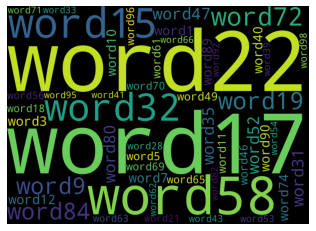

In [172]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]

from wordcloud import WordCloud, STOPWORDS #for exactly what it says, wordcloud and stopwords (only representative words!)
firstcloud = WordCloud( stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

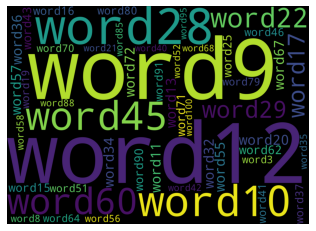

In [227]:
from wordcloud import WordCloud, STOPWORDS #for exactly what it says, wordcloud and stopwords (only representative words!)
firstcloud = WordCloud( stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(second_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

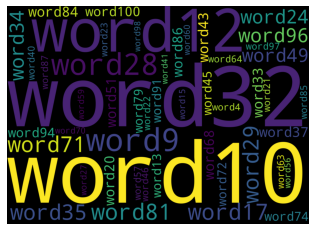

In [228]:
from wordcloud import WordCloud, STOPWORDS #for exactly what it says, wordcloud and stopwords (only representative words!)
firstcloud = WordCloud( stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

# Real Case Problem

In [229]:
lda = LatentDirichletAllocation(n_components=3, max_iter=5,
                                learning_method = 'online',
                                random_state = 0)

lda.fit(cora)
lda_topic_matrix = lda.fit_transform(cora)

In [230]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)
lda_keys

[1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 1,


In [231]:
print("\nTopics in LDA model: ")
tf_feature_names =cora.columns #note that tf_vectorizer is an LemmaCountVectorizer object and with this command we get the whole dictionary of words
print_top_words(lda, tf_feature_names, nubmer_of_words)


Topics in LDA model: 

Topic #0:network neural networks learning model paper training method input time

Topic #1:algorithm model learning algorithms bayesian data models paper results show

Topic #2:learning paper problem system approach knowledge results genetic design algorithms


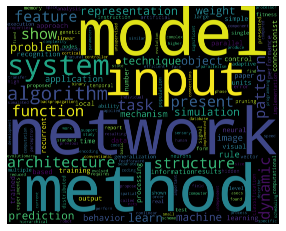

In [237]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-200 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-200 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-200 - 1 :-1]]

from wordcloud import WordCloud, STOPWORDS #for exactly what it says, wordcloud and stopwords (only representative words!)
firstcloud = WordCloud( stopwords=STOPWORDS,
                          background_color='black',
                          width=5000,
                          height=4000
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

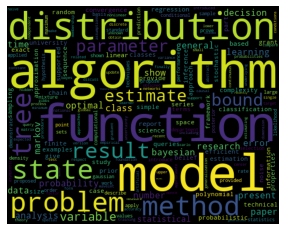

In [238]:

firstcloud = WordCloud( stopwords=STOPWORDS,
                          background_color='black',
                          width=500,
                          height=400
                         ).generate(" ".join(second_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

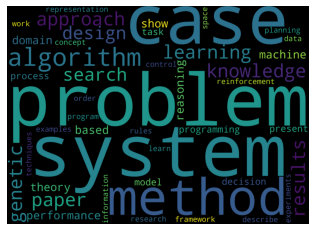

In [234]:

firstcloud = WordCloud( stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(third_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

In [239]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2407 samples in 0.012s...
[t-SNE] Computed neighbors for 2407 samples in 0.091s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2407
[t-SNE] Computed conditional probabilities for sample 2000 / 2407
[t-SNE] Computed conditional probabilities for sample 2407 / 2407
[t-SNE] Mean sigma: 0.003886
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.963394
[t-SNE] KL divergence after 2000 iterations: 0.323810


In [240]:
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

#for t in range(n_topics):
#    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
#                  text=top_3_words_lsa[t], text_color=colormap[t])
#    plot.add_layout(label)
    
show(plot)

In [243]:
###try 4 topics
n_topics=4

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap=colormap[:n_topics]

lda = LatentDirichletAllocation(n_components=4, max_iter=5,
                                learning_method = 'online',
                                random_state = 0)

lda.fit(cora)
lda_topic_matrix = lda.fit_transform(cora)

lda_keys = get_keys(lda_topic_matrix)

tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

#for t in range(n_topics):
#    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
#                  text=top_3_words_lsa[t], text_color=colormap[t])
#    plot.add_layout(label)
    
show(plot)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2407 samples in 0.002s...
[t-SNE] Computed neighbors for 2407 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2407
[t-SNE] Computed conditional probabilities for sample 2000 / 2407
[t-SNE] Computed conditional probabilities for sample 2407 / 2407
[t-SNE] Mean sigma: 0.011745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.975342
[t-SNE] KL divergence after 2000 iterations: 0.521362


In [264]:
n_topics=5
colormap=colormap[:n_topics]

lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online',
                                random_state = 0)

lda.fit(cora)
lda_topic_matrix = lda.fit_transform(cora)

lda_keys = get_keys(lda_topic_matrix)

tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

#for t in range(n_topics):
#    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
#                  text=top_3_words_lsa[t], text_color=colormap[t])
#    plot.add_layout(label)
    
show(plot)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2407 samples in 0.002s...
[t-SNE] Computed neighbors for 2407 samples in 0.090s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2407
[t-SNE] Computed conditional probabilities for sample 2000 / 2407
[t-SNE] Computed conditional probabilities for sample 2407 / 2407
[t-SNE] Mean sigma: 0.034092
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.390549
[t-SNE] KL divergence after 2000 iterations: 0.741484


In [263]:
n_topics=10

colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap=colormap[:n_topics]

lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method = 'online',
                                random_state = 0)

lda.fit(cora)
lda_topic_matrix = lda.fit_transform(cora)

lda_keys = get_keys(lda_topic_matrix)

tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

#for t in range(n_topics):
#    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
#                  text=top_3_words_lsa[t], text_color=colormap[t])
#    plot.add_layout(label)
    
show(plot)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2407 samples in 0.005s...
[t-SNE] Computed neighbors for 2407 samples in 0.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2407
[t-SNE] Computed conditional probabilities for sample 2000 / 2407
[t-SNE] Computed conditional probabilities for sample 2407 / 2407
[t-SNE] Mean sigma: 0.117999
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.772537
[t-SNE] KL divergence after 2000 iterations: 1.023322
